Hari Kosuru, hk8663
Atreya Misra, am73676

In [1]:
import tensorflow as tf
import numpy as np
import glob
import os
import sys
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.misc import imread
import dcgan_model
import dcgan_utils
import dcgan_ops
import celebA_estimators

Part 2:
Reference the picture below for z, where each vector's first element be 1.

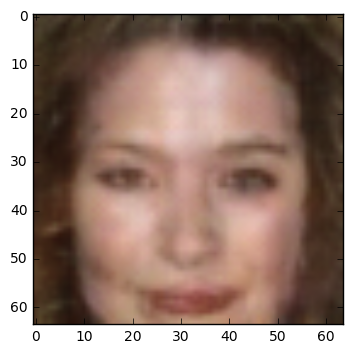

In [2]:
s=(64,100)
s=np.zeros(s)
s[0,0]=1

# define the graph
sess = tf.Session()
z = tf.placeholder(tf.float32, shape=[64, 100], name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

feed_dict = {z : s}
x_hat_val = sess.run(x_hat, feed_dict=feed_dict)

# inspect
im_idx = 3
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[im_idx, :]))

[ 1.]
[ 1.]
[ 0.99993372]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 0.9087922]


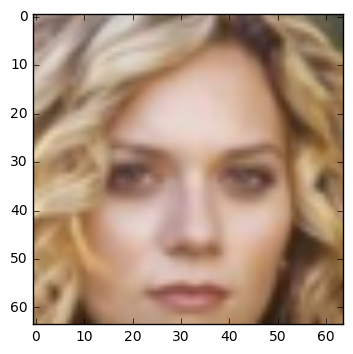

In [3]:
# define the graph
x_hat = tf.placeholder(tf.float32, shape = [1, 64*64*3], name='x_hat')
d_loss, restore_dict, restore_path = celebA_estimators.dcgan_discrim(x_hat, sess)

# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)
# apply on random images
for i in range(10):
    x_hat_val = np.reshape(2*np.random.random((1, 64, 64, 3)) - 1, [1, -1])
    feed_dict = {x_hat: x_hat_val}
    d_loss_val = sess.run(d_loss, feed_dict=feed_dict)
    print np.exp(-d_loss_val)

image_paths = glob.glob(os.path.join("../data", 'celebA', "*.jpg"))
image_paths.sort()
image_paths = image_paths[:64]
images = [dcgan_utils.get_image(image_path, 108) for image_path in image_paths]

# Apply on one image
im_idx = 12
x_hat_val = images[im_idx].reshape([1, -1])
feed_dict = {x_hat: x_hat_val}
d_loss_val = sess.run(d_loss, feed_dict=feed_dict)

# inspect
plt.imshow(dcgan_utils.inverse_transform(images[im_idx]))
print np.exp(-d_loss_val)

# clean up
sess.close()

Part 3:

Both of our generated pictures are below, G(z1) and G(z2) which closely approximate the input pictures.

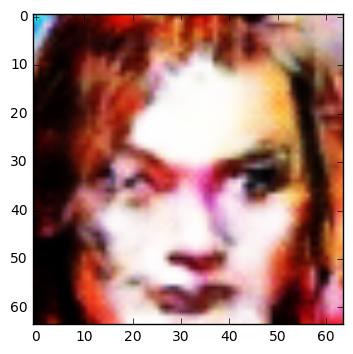

In [4]:
#generates image for "filname"
filename = 'patt.jpg'
image = imread(filename)
training_data = image

#Define variable and G(z)
altSess = tf.Session()
z = tf.Variable(tf.ones((64, 100)))
input_img = tf.placeholder(tf.float32, shape = [64, 64, 3], name = 'input_img')
G, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, altSess)
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(altSess, restore_path)

#Define training model
loss = tf.square(tf.norm(G - input_img))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

#Run
init = tf.global_variables_initializer()
altSess.run(init)
for i in xrange(15):
    altSess.run(train, {input_img:training_data})

output = altSess.run(z)
z = tf.placeholder(tf.float32, shape = [64, 100])
G, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, altSess)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(altSess, restore_path)
img_gen = altSess.run(G, feed_dict = {z:output})

plt.imshow(dcgan_utils.inverse_transform(img_gen[0, :]))

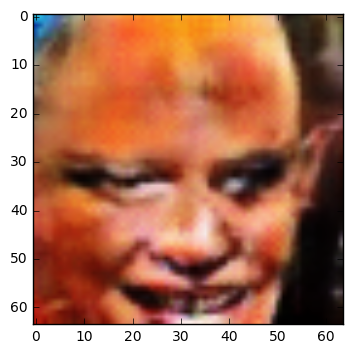

In [9]:
#generates image for "filname"
filename = 'valvano.jpg'
image = imread(filename)
training_data = image

#Define variable and G(z)
altSess = tf.Session()
z = tf.Variable(-1*tf.ones((64, 100)))
input_img = tf.placeholder(tf.float32, shape = [64, 64, 3], name = 'input_img')
G, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, altSess)
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(altSess, restore_path)

#Define training model
loss = tf.square(tf.norm(G - input_img))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

#Run
init = tf.global_variables_initializer()
altSess.run(init)
for i in xrange(15):
    altSess.run(train, {input_img:training_data})

output_1 = altSess.run(z)
z = tf.placeholder(tf.float32, shape = [64, 100])
G, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, altSess)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(altSess, restore_path)
img_gen = altSess.run(G, feed_dict = {z:output_1})

plt.imshow(dcgan_utils.inverse_transform(img_gen[0, :]))

Part 4:

Below is the approximation of the new face.

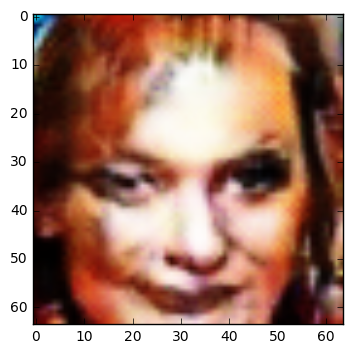

In [10]:
c = 0.6
picture_1 = imread('patt.jpg')
picture_2 = imread('valvano.jpg')
output_2 = c*output + (1 - c)*output_1
z = tf.placeholder(tf.float32, shape = [64, 100])
G, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, altSess)

restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(altSess, restore_path)

img_gen = altSess.run(G, feed_dict = {z:output_2})
plt.imshow(dcgan_utils.inverse_transform(img_gen[0, :]))

In [7]:
altSess.close()